In [3]:
import skimage 
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torchvision
import torchvision.transforms as transforms

#from torchvision import datasets
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [4]:
transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.ToTensor()
])

In [5]:
data_dir = 'cs535-Image/Covid-Dataset/dataset/'
dataset = torchvision.datasets.ImageFolder(root='cs535-Image/Covid-Dataset/dataset/',transform = transform) # our custom dataset
dataloader_1 = torch.utils.data.DataLoader(dataset,
                                        batch_size=5,
                                        shuffle=True,
                                        num_workers=2)


dataset



Dataset ImageFolder
    Number of datapoints: 98
    Root location: cs535-Image/Covid-Dataset/dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [6]:
image_batch, label_batch = iter(dataloader_1).next()

In [7]:
img = torchvision.utils.make_grid(image_batch)

img.shape

torch.Size([3, 516, 2572])

In [8]:
img_1 = np.transpose(img, (1,2,0))
img_1.shape

torch.Size([516, 2572, 3])

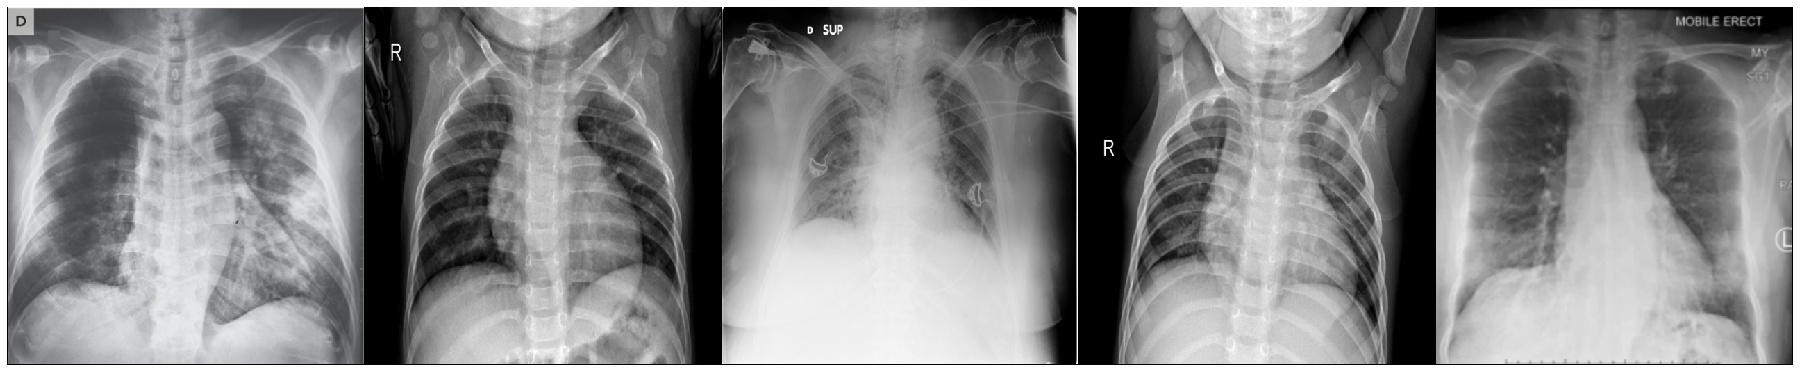

In [9]:
plt.figure(figsize=(32,24))

plt.imshow(img_1)
plt.axis('off')
plt.show()

In [10]:

pop_mean = []
pop_std = []



for i, data in enumerate(dataloader_1):
    #Extract Images at field position 0: 
    #print("batch Count: ", i)
    numpy_image = data[0].numpy()
    #print("batch Count:numpy_image", numpy_image.shape)
    # axis=(0,2,3) => (B, H, W)
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std = np.std(numpy_image, axis=(0,2,3))
    #batch_mean = np.mean(numpy_image)
    #batch_std = np.std(numpy_image)
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [11]:

pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

# (Total Batchs, ( Mean_Value , Std_Value ) => For each channel )
pop_mean.shape, pop_std.shape 

((20, 3), (20, 3))

In [12]:
# DO NOT RUN - Original Version -> Already Done At the top

pop_mean = pop_mean.mean(axis =0 )
pop_std = pop_std.mean(axis =0 )

# To Print MEAN across all the batches and standard Deviation

print("Mean across all the batches: ",pop_mean)
print("standard Deviation across all the batches: ",pop_std)

Mean across all the batches:  [0.49166298 0.49333555 0.49526492]
standard Deviation across all the batches:  [0.2364957  0.23657238 0.23687819]


In [13]:
pop_mean, pop_std

(array([0.49166298, 0.49333555, 0.49526492], dtype=float32),
 array([0.2364957 , 0.23657238, 0.23687819], dtype=float32))

In [78]:
transform = transforms.Compose([
    transforms.Resize(size=(512,512)),
    transforms.Grayscale(3),
    transforms.ToTensor()
])


#transforms.Normalize(mean=pop_mean,
#                         std=pop_std)

In [79]:
dataset_train = torchvision.datasets.ImageFolder(root='cs535-Image/Covid-Dataset/dataset/', transform = transform)

In [80]:
# LABELS

dataset_train.class_to_idx, dataset_train.classes

({'covid': 0, 'normal': 1}, ['covid', 'normal'])

In [81]:
dataloader = torch.utils.data.DataLoader(dataset_train,
                                        batch_size=5,
                                        shuffle=False,
                                        num_workers=2)


dataloader

In [82]:
image_batch, label_batch = iter(dataloader).next()
image_batch.shape

torch.Size([5, 3, 512, 512])

In [83]:
img = torchvision.utils.make_grid(image_batch,nrow=5)

In [84]:
img = np.transpose(img, (1,2,0))
img.shape

torch.Size([516, 2572, 3])

In [85]:
m, M = img.min(), img.max()

m, M

(tensor(0.), tensor(1.))

In [86]:
#img = (1 / abs(m) * M ) * img + 0.3

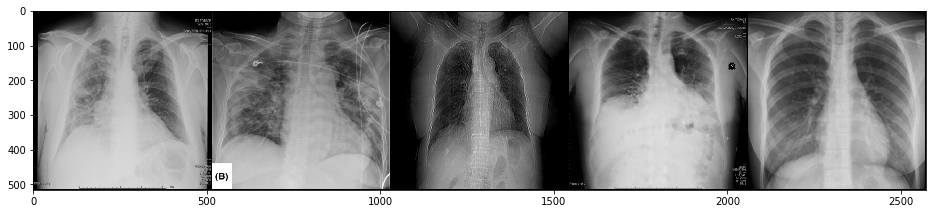

In [87]:


plt.figure(figsize=(16, 12))

plt.imshow(img)
plt.show()